## Susan Catanoso
## Pima Indians - Diabetes Prediction
## Neural Network for binary classification

# Run the model for a .0001 learning rate

In [1]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set random seed for reproducibility
np.random.seed(44)

# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]    # These columns are Number of times pregnant, Plasma glucose concentration, diastolic blood pressure, 
                      # triceps skin fold thickness, 2-hour serum insulin, body mass index, diabetes pedigree function, Age
Y = dataset[:,8]      # Indicates whether or not the individual developed diabetes in five years (yes/no indicated by 1/0)

# create model 
model = Sequential()        # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
model.add(Dense(12, input_dim = 8, activation = 'relu')) # Connects densely (all nodes connect to every node in the next layer) 8 inputs 
                                                         # to next layer of 12 neurons; uses ReLU activation
model.add(Dense(8, activation = 'relu' ))                # Create next level of neural network with 8 neurons-no input layer, just prior 
                                                         # layer; uses ReLU activation
model.add(Dense(1, activation = 'sigmoid'))    # Create last level of neural network with 1 neuron-no input layer; uses Sigmoid activation

# Compile model
adam = optimizers.Adam(lr=.0001)                               # Assign the optimizer algorithm and learning rate to a variable
model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])  # Compiles the model using the parameters speccified
                                                                                         # Loss is the loss function to be used; 
                                                                                         # Optimizer determines the learning rate
# Train the model over 1500 epochs 
training_iteration = 1500

# Fit the model
model_learningrate001 = model.fit(X, Y, epochs = training_iteration, verbose = 0)  # Generate the model with X as input and Y as the result; 
                                                        # model will run through "training_iteration" number of iterations 
                                                        # to improve the model; assigning the results to a variable will create 
                                                        # an object with the history of the iterations, 
                                                        # setting verbose to 0 will suppress the output from displaying.

# Evaluate the model
scores001 = model.evaluate(X, Y)               # assigns the final loss and final accuracy of the model to a list  

Y_predict001 = model.predict(X)                # assigns the predicted Y for each observation of X

print("\n%s: %.2f%%" % (model.metrics_names[1], scores001[1]*100))

# Dr Manson included this code which will create confusion matrix details
rounded001 = [round(i[0]) for i in Y_predict001]
y_pred001 = np.array(rounded001,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred001)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

Using TensorFlow backend.


768/768 [==============================] - 0s 55us/step

acc: 74.74%
Confusion Matrix
True negatives:  434
False negatives:  128
False positives:  66
True positives:  140


In [2]:
# Put data into a dataframe to manipulate to graph
Y_observed = pd.DataFrame(Y.reshape(len(Y),1))
Y_observed.columns = ['Observed_Diabetes']
Y_predict001 = pd.DataFrame(Y_predict001)
Y_predict001.columns = ['Predicted_Diabetes']

Results001 = pd.concat([Y_observed, Y_predict001], axis = 1)
sum(Results001.Observed_Diabetes)                                   # Check to verify the number of people who should show up as having diabetes

268.0

In [3]:
# Convert the 1.0 to Yes ( have diabetes in 5 years) and the 0.0 to No (don't have diabetes in 5 years) in the Observed_Diabetes columns
Results001['Observed_Diabetes']=Results001['Observed_Diabetes'].astype(str)
Results001['Observed_Diabetes'].replace('1.0', 'Yes', inplace=True)
Results001['Observed_Diabetes'].replace('0.0', 'No', inplace=True)
#Results001

Text(0.5, 1.0, 'Observed Diabetes vs Predicted % of Developing Diabetes in Pima Indians (.0001 Learning Rate adam Model)')

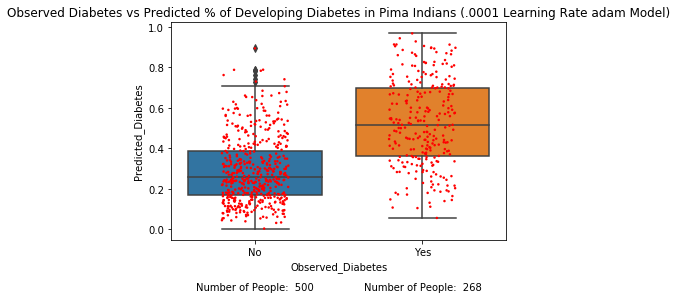

In [4]:
# Generate a boxplot to show the distribution of the predicted values vs the actual observed values, and also show the predictions with jitter 
ax = sns.boxplot(x = 'Observed_Diabetes', y = 'Predicted_Diabetes', data = Results001, order =['No', 'Yes'])     # standard boxplot
ax = sns.stripplot(x = 'Observed_Diabetes', y = 'Predicted_Diabetes', data = Results001, order = ['No', 'Yes'], color = 'red', jitter = 0.2, size = 2.5)   
                                                                                                                 # Add jitter to boxplot

# Add number of observations to the boxplot
nobs = Results001.groupby('Observed_Diabetes').size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = [ 'Number of People:  ' + i for i in nobs]


pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
    plt.text(pos[tick], -.3, nobs[tick], horizontalalignment='center', size = 'medium', color = 'black')
plt.title('Observed Diabetes vs Predicted % of Developing Diabetes in Pima Indians (.0001 Learning Rate adam Model)')


# Relating the confusion matrix to the boxplot above, the true negatives were 434; therefore 434 of the red points on the No line correctly represented people who did not have diabetes [true negatives].  66 red points on the No line were people who were told incorrectly that they had diabetes [false positives] (those are the red dots at upper part of the No line with the higher predicted percentages).

# 140 red dots on the Yes line were true positives, while 128 points on the Yes line (those red dots toward the bottom with lower predicted percentages) were false negatives.

In [5]:
accuracy001 = model_learningrate001.history['acc']    #  Assigns the accuracy numbers to a list
loss001 = model_learningrate001.history['loss']       #  Assigns the loss numbers to a list

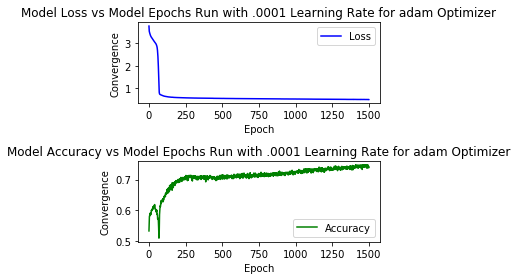

In [6]:
# Plot accuracy and loss vs epoch

plt.subplot(2,1,1)
plt.plot(loss001,label='Loss', color = 'blue')
plt.xlabel('Epoch')
plt.ylabel('Convergence')
plt.legend(loc = 'best')
plt.title("Model Loss vs Model Epochs Run with .0001 Learning Rate for adam Optimizer")

plt.subplot(2,1,2)
plt.plot(accuracy001, label='Accuracy', color = 'green')
plt.xlabel('Epoch')
plt.ylabel('Convergence')
plt.legend(loc = 'best')
plt.title("Model Accuracy vs Model Epochs Run with .0001 Learning Rate for adam Optimizer")
plt.tight_layout()
plt.show()

# Rerun the model with .001 learning rate

In [7]:
# set random seed for reproducibility
np.random.seed(44)

# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]    # These columns are Number of times pregnant, Plasma glucose concentration, diastolic blood pressure, 
                      # triceps skin fold thickness, 2-hour serum insulin, body mass index, diabetes pedigree function, Age
Y = dataset[:,8]      # Indicates whether or not the individual developed diabetes in five years (yes/no indicated by 1/0)

# create model 
model = Sequential()        # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
model.add(Dense(12, input_dim = 8, activation = 'relu')) # Connects densely (all nodes connect to every node in the next layer) 8 inputs 
                                                         # to next layer of 12 neurons; uses ReLU activation
model.add(Dense(8, activation = 'relu' ))                # Create next level of neural network with 8 neurons-no input layer, just prior 
                                                         # layer; uses ReLU activation
model.add(Dense(1, activation = 'sigmoid'))    # Create last level of neural network with 1 neuron-no input layer; uses Sigmoid activation



# Compile model
adam = optimizers.Adam(lr=.001)                               # Assign the optimizer algorithm and learning rate to a variable
model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])  # Compiles the model using the parameters speccified
                                                                                         # Loss is the loss function to be used; 
                                                                                         # Optimizer determines the learning rate
# Train the model over 1500 epochs 
training_iteration = 1500

# Fit the model
model_learningrate01 = model.fit(X, Y, epochs = training_iteration, verbose = 0)  # Generate the model with X as input and Y as the result; 
                                                        # model will run through "training_iteration" number of iterations 
                                                        # to improve the model; assigning the results to a variable will create 
                                                        # an object with the history of the iterations, 
                                                        # setting verbose to 0 will suppress the output from displaying.

# Evaluate the model
scores01 = model.evaluate(X, Y)               # assigns the final loss and final accuracy of the model to a list  

Y_predict01 = model.predict(X)                # assigns the predicted Y for each observation of X

print("\n%s: %.2f%%" % (model.metrics_names[1], scores01[1]*100))

# Dr Manson included this code which will create confusion matrix details
rounded01 = [round(i[0]) for i in Y_predict01]
y_pred01 = np.array(rounded01,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred01)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

768/768 [==============================] - 0s 69us/step

acc: 79.30%
Confusion Matrix
True negatives:  442
False negatives:  101
False positives:  58
True positives:  167


In [8]:
# Put data into a dataframe to manipulate to graph
Y_observed = pd.DataFrame(Y.reshape(len(Y),1))
Y_observed.columns = ['Observed_Diabetes']
Y_predict01 = pd.DataFrame(Y_predict01)
Y_predict01.columns = ['Predicted_Diabetes']

Results01 = pd.concat([Y_observed, Y_predict01], axis = 1)
sum(Results01.Observed_Diabetes)                                   # Check to verify the number of people who should show up as having diabetes

268.0

In [9]:
# Convert the 1.0 to Yes ( have diabetes in 5 years) and the 0.0 to No (don't have diabetes in 5 years) in the Observed_Diabetes columns
Results01['Observed_Diabetes']=Results01['Observed_Diabetes'].astype(str)
Results01['Observed_Diabetes'].replace('1.0', 'Yes', inplace=True)
Results01['Observed_Diabetes'].replace('0.0', 'No', inplace=True)
#Results01

Text(0.5, 1.0, 'Observed Diabetes vs Predicted % of Developing Diabetes in Pima Indians (.001 Learning Rate adam Model)')

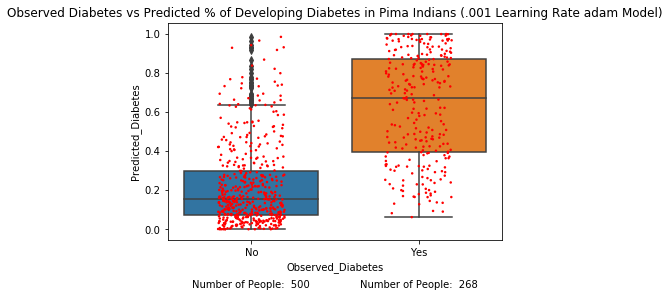

In [10]:
# Generate a boxplot to show the distribution of the predicted values vs the actual observed values, and also show the predictions with jitter 
ax = sns.boxplot(x = 'Observed_Diabetes', y = 'Predicted_Diabetes', data = Results01, order =['No', 'Yes'])     # standard boxplot
ax = sns.stripplot(x = 'Observed_Diabetes', y = 'Predicted_Diabetes', data = Results01, order = ['No', 'Yes'], color = 'red', jitter = 0.2, size = 2.5)   
                                                                                                                 # Add jitter to boxplot

# Add number of observations to the boxplot
nobs = Results01.groupby('Observed_Diabetes').size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = [ 'Number of People:  ' + i for i in nobs]


pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
    plt.text(pos[tick], -.3, nobs[tick], horizontalalignment='center', size = 'medium', color = 'black')
plt.title('Observed Diabetes vs Predicted % of Developing Diabetes in Pima Indians (.001 Learning Rate adam Model)')

# Relating the confusion matrix to the boxplot above, the true negatives were 442; therefore 442 of the red points on the No line correctly represented people who did not have diabetes [true negatives].  58 red points on the No line were people who were told incorrectly that they had diabetes [false positives] (those are the red dots toward the top of the No line with the higher predicted percentage number).

# 167 red dots on the Yes line were true positives, while 101 points on the Yes line (those red dots toward the bottom with lower percentages) were false negatives.

In [11]:
accuracy01 = model_learningrate01.history['acc']    #  Assigns the accuracy numbers to a list
loss01 = model_learningrate01.history['loss']       #  Assigns the loss numbers to a list

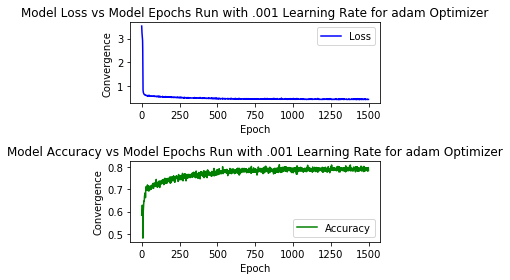

In [12]:
# Plot accuracy and loss vs epoch

plt.subplot(2,1,1)
plt.plot(loss01,label='Loss', color = 'blue')
plt.xlabel('Epoch')
plt.ylabel('Convergence')
plt.legend(loc = 'best')
plt.title("Model Loss vs Model Epochs Run with .001 Learning Rate for adam Optimizer")

plt.subplot(2,1,2)
plt.plot(accuracy01, label='Accuracy', color = 'green')
plt.xlabel('Epoch')
plt.ylabel('Convergence')
plt.legend(loc = 'best')
plt.title("Model Accuracy vs Model Epochs Run with .001 Learning Rate for adam Optimizer")
plt.tight_layout()
plt.show()

# Rerun the model with .01 learning rate

In [13]:
# set random seed for reproducibility
np.random.seed(44)

# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]    # These columns are Number of times pregnant, Plasma glucose concentration, diastolic blood pressure, 
                      # triceps skin fold thickness, 2-hour serum insulin, body mass index, diabetes pedigree function, Age
Y = dataset[:,8]      # Indicates whether or not the individual developed diabetes in five years (yes/no indicated by 1/0)

# create model 
model = Sequential()        # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
model.add(Dense(12, input_dim = 8, activation = 'relu')) # Connects densely (all nodes connect to every node in the next layer) 8 inputs 
                                                         # to next layer of 12 neurons; uses ReLU activation
model.add(Dense(8, activation = 'relu' ))                # Create next level of neural network with 8 neurons-no input layer, just prior 
                                                         # layer; uses ReLU activation
model.add(Dense(1, activation = 'sigmoid'))    # Create last level of neural network with 1 neuron-no input layer; uses Sigmoid activation

# Compile model
adam = optimizers.Adam(lr=.01)                               # Assign the optimizer algorithm and learning rate to a variable
model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])  # Compiles the model using the parameters speccified
                                                                                         # Loss is the loss function to be used; 
                                                                                         # Optimizer determines the learning rate
# Train the model over 1500 epochs 
training_iteration = 1500

# Fit the model
model_learningrate1 = model.fit(X, Y, epochs = training_iteration, verbose = 0)  # Generate the model with X as input and Y as the result; 
                                                        # model will run through "training_iteration" number of iterations 
                                                        # to improve the model; assigning the results to a variable will create 
                                                        # an object with the history of the iterations, 
                                                        # setting verbose to 0 will suppress the output from displaying.

# Evaluate the model
scores1 = model.evaluate(X, Y)               # assigns the final loss and final accuracy of the model to a list  

Y_predict1 = model.predict(X)                # assigns the predicted Y for each observation of X

print("\n%s: %.2f%%" % (model.metrics_names[1], scores1[1]*100))

# Dr Manson included this code which will create confusion matrix details
rounded1 = [round(i[0]) for i in Y_predict1]
y_pred1 = np.array(rounded1,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred1)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

768/768 [==============================] - 0s 90us/step

acc: 82.29%
Confusion Matrix
True negatives:  457
False negatives:  93
False positives:  43
True positives:  175


In [14]:
# Put data into a dataframe to manipulate to graph
Y_observed = pd.DataFrame(Y.reshape(len(Y),1))
Y_observed.columns = ['Observed_Diabetes']
Y_predict1 = pd.DataFrame(Y_predict1)
Y_predict1.columns = ['Predicted_Diabetes']

Results1 = pd.concat([Y_observed, Y_predict1], axis = 1)
sum(Results1.Observed_Diabetes)                                   # Check to verify the number of people who should show up as having diabetes

268.0

In [15]:
# Convert the 1.0 to Yes ( have diabetes in 5 years) and the 0.0 to No (don't have diabetes in 5 years) in the Observed_Diabetes columns
Results1['Observed_Diabetes']=Results1['Observed_Diabetes'].astype(str)
Results1['Observed_Diabetes'].replace('1.0', 'Yes', inplace=True)
Results1['Observed_Diabetes'].replace('0.0', 'No', inplace=True)
#Results150

Text(0.5, 1.0, 'Observed Diabetes vs Predicted % of Developing Diabetes in Pima Indians (.01 Learning Rate adam Model)')

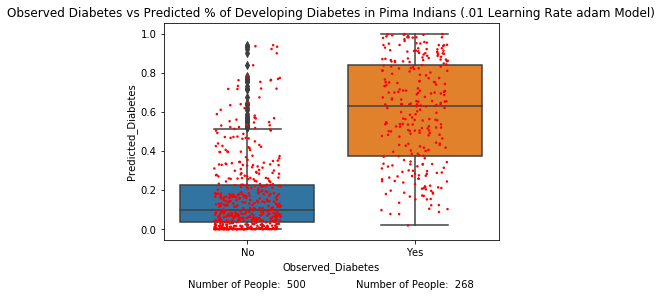

In [16]:
# Generate a boxplot to show the distribution of the predicted values vs the actual observed values, and also show the predictions with jitter 
ax = sns.boxplot(x = 'Observed_Diabetes', y = 'Predicted_Diabetes', data = Results1, order =['No', 'Yes'])     # standard boxplot
ax = sns.stripplot(x = 'Observed_Diabetes', y = 'Predicted_Diabetes', data = Results1, order = ['No', 'Yes'], color = 'red', jitter = 0.2, size = 2.5)   
                                                                                                                 # Add jitter to boxplot

# Add number of observations to the boxplot
nobs = Results1.groupby('Observed_Diabetes').size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = [ 'Number of People:  ' + i for i in nobs]


pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
    plt.text(pos[tick], -.3, nobs[tick], horizontalalignment='center', size = 'medium', color = 'black')
plt.title('Observed Diabetes vs Predicted % of Developing Diabetes in Pima Indians (.01 Learning Rate adam Model)')

# Relating the confusion matrix to the boxplot above, the true negatives were 457; therefore 457 of the red points on the No line correctly represented people who did not have diabetes [true negatives].  43 red points on the No line were people who were told incorrectly that they had diabetes [false positives] (Those are the red dots toward the top of the No line with the higher predicted percentage number).

# 175 red dots on the Yes line were true positives, while 93 points on the Yes line (those red dots toward the bottom with lower percentages) were false negatives.

In [17]:
accuracy1 = model_learningrate1.history['acc']    #  Assigns the accuracy numbers to a list
loss1 = model_learningrate1.history['loss']       #  Assigns the loss numbers to a list

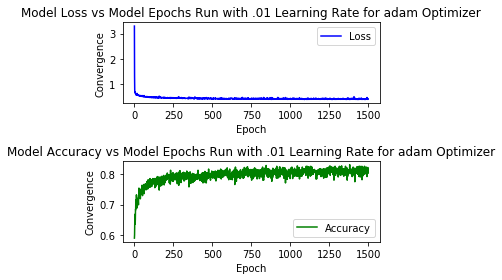

In [18]:
# Plot accuracy and loss vs epoch

plt.subplot(2,1,1)
plt.plot(loss1,label='Loss', color = 'blue')
plt.xlabel('Epoch')
plt.ylabel('Convergence')
plt.legend(loc = 'best')
plt.title("Model Loss vs Model Epochs Run with .01 Learning Rate for adam Optimizer")

plt.subplot(2,1,2)
plt.plot(accuracy1, label='Accuracy', color = 'green')
plt.xlabel('Epoch')
plt.ylabel('Convergence')
plt.legend(loc = 'best')
plt.title("Model Accuracy vs Model Epochs Run with .01 Learning Rate for adam Optimizer")
plt.tight_layout()
plt.show()

# Plot the loss in one plot and the accuracy in another for all three learning rates.

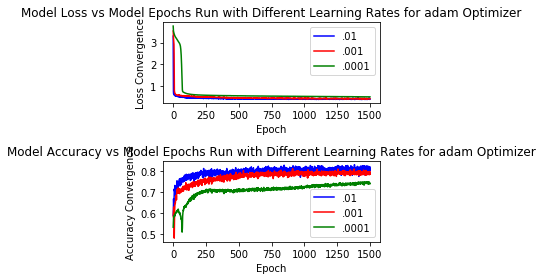

In [37]:
plt.subplot(2,1,1)
plt.plot(loss1,label='.01', color = 'blue')
plt.plot(loss01, label = '.001', color = 'red')
plt.plot(loss001, label = '.0001', color = 'green')
plt.xlabel('Epoch')
plt.ylabel('Loss Convergence')
plt.legend(loc = 'best')
plt.title("Model Loss vs Model Epochs Run with Different Learning Rates for adam Optimizer")

plt.subplot(2,1,2)
plt.plot(accuracy1, label='.01', color = 'blue')
plt.plot(accuracy01, label = '.001', color = 'red')
plt.plot(accuracy001, label = '.0001', color = 'green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Convergence')
plt.legend(loc = 'best')
plt.title("Model Accuracy vs Model Epochs Run with Different Learning Rates for adam Optimizer")
plt.tight_layout()
plt.show()

# From looking at the combined graphs of loss and accuracy, you can see that the learning rate does affect the speed with which the model learns as well as how accurately how quickly the model predicts.  

In [31]:
# set random seed for reproducibility
np.random.seed(44)

# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]    # These columns are Number of times pregnant, Plasma glucose concentration, diastolic blood pressure, 
                      # triceps skin fold thickness, 2-hour serum insulin, body mass index, diabetes pedigree function, Age
Y = dataset[:,8]      # Indicates whether or not the individual developed diabetes in five years (yes/no indicated by 1/0)

# create model 
model = Sequential()        # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
model.add(Dense(12, input_dim = 8, activation = 'relu')) # Connects densely (all nodes connect to every node in the next layer) 8 inputs 
                                                         # to next layer of 12 neurons; uses ReLU activation
model.add(Dense(8, activation = 'relu' ))                # Create next level of neural network with 8 neurons-no input layer, just prior 
                                                         # layer; uses ReLU activation
model.add(Dense(1, activation = 'sigmoid'))    # Create last level of neural network with 1 neuron-no input layer; uses Sigmoid activation

# Compile model
adam = optimizers.Adam(lr=.0326)                               # Assign the optimizer algorithm and learning rate to a variable
model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])  # Compiles the model using the parameters speccified
                                                                                         # Loss is the loss function to be used; 
                                                                                         # Optimizer determines the learning rate
# Train the model over 1500 epochs 
training_iteration = 1500

# Fit the model
model_learningrate1 = model.fit(X, Y, epochs = training_iteration, verbose = 0)  # Generate the model with X as input and Y as the result; 
                                                        # model will run through "training_iteration" number of iterations 
                                                        # to improve the model; assigning the results to a variable will create 
                                                        # an object with the history of the iterations, 
                                                        # setting verbose to 0 will suppress the output from displaying.

# Evaluate the model
scores1 = model.evaluate(X, Y)               # assigns the final loss and final accuracy of the model to a list  

Y_predict1 = model.predict(X)                # assigns the predicted Y for each observation of X

print("\n%s: %.2f%%" % (model.metrics_names[1], scores1[1]*100))

# Dr Manson included this code which will create confusion matrix details
rounded1 = [round(i[0]) for i in Y_predict1]
y_pred1 = np.array(rounded1,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred1)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

768/768 [==============================] - 0s 272us/step

acc: 65.10%
Confusion Matrix
True negatives:  500
False negatives:  268
False positives:  0
True positives:  0


# ALL data was predicted to be false at a slightly larger learning rate (.0326). Selecting an appropriate size learning rate is very important for creating a good model.  This model has a learning rate size that doesn't allow convergence in the epochs being run (1500).  Even though the loss function is being reduced, the model's accuracy is the probablilty that the answer is randomly guessed at this learning rate.

In [34]:
accuracylarge = model_learningrate1.history['acc']    #  Assigns the accuracy numbers to a list
losslarge = model_learningrate1.history['loss']       #  Assigns the loss numbers to a list

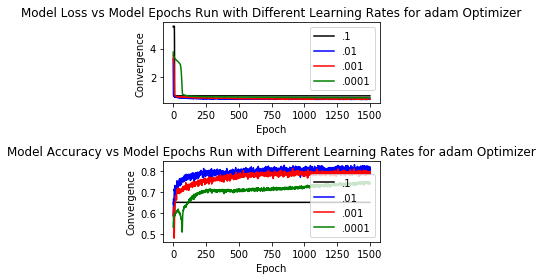

In [39]:
plt.subplot(2,1,1)
plt.plot(losslarge, label = '.1', color = 'black')
plt.plot(loss1,label='.01', color = 'blue')
plt.plot(loss01, label = '.001', color = 'red')
plt.plot(loss001, label = '.0001', color = 'green')
plt.xlabel('Epoch')
plt.ylabel('Convergence')
plt.legend(loc = 'best')
plt.title("Model Loss vs Model Epochs Run with Different Learning Rates for adam Optimizer")

plt.subplot(2,1,2)
plt.plot(accuracylarge, label = '.1', color = 'black')
plt.plot(accuracy1, label='.01', color = 'blue')
plt.plot(accuracy01, label = '.001', color = 'red')
plt.plot(accuracy001, label = '.0001', color = 'green')
plt.xlabel('Epoch')
plt.ylabel('Convergence')
plt.legend(loc = 'best')
plt.title("Model Accuracy vs Model Epochs Run with Different Learning Rates for adam Optimizer")
plt.tight_layout()
plt.show()